In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


Exercise 1. Explore the readme

In your notebook, open and print the contents of readme.md.
Question: According to the readme, which column in the dataset corresponds to the TB death rate?


In [4]:
fn = "/content/drive/MyDrive/route_TB_Data_explorer_5.7_Jinich/data/readme.md"
with open(fn, "r") as fh:
    text = fh.read()
print(text)

# Tuberculosis deaths - Data package

This data package contains the data that powers the chart ["Tuberculosis deaths"](https://ourworldindata.org/grapher/tuberculosis-deaths-who?v=1&csvType=full&useColumnShortNames=false) on the Our World in Data website. It was downloaded on September 23, 2025.

### Active Filters

A filtered subset of the full data was downloaded. The following filters were applied:

## CSV Structure

The high level structure of the CSV file is that each row is an observation for an entity (usually a country or region) and a timepoint (usually a year).

The first two columns in the CSV file are "Entity" and "Code". "Entity" is the name of the entity (e.g. "United States"). "Code" is the OWID internal entity code that we use if the entity is a country or region. For normal countries, this is the same as the [iso alpha-3](https://en.wikipedia.org/wiki/ISO_3166-1_alpha-3) code of the entity (e.g. "USA") - for non-standard countries like historical countries these are c

Exercise 2. Load the dataset

- Using pandas, load tuberculosis-deaths-who.csv into a DataFrame.
- Display the first 5 rows with .head().


In [6]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/route_TB_Data_explorer_5.7_Jinich/data/tuberculosis-deaths-who.csv")
df.head()

,Entity,Code,Year,Estimated number of deaths from all forms of tuberculosis
0,Afghanistan,AFG,2000,14000
1,Afghanistan,AFG,2001,13000
2,Afghanistan,AFG,2002,12000
3,Afghanistan,AFG,2003,13000
4,Afghanistan,AFG,2004,12000


Exercise 3. Inspect the DataFrame
- Print out the column names.
Use .info() to see data types and missing values.
Use .describe() to summarize numeric columns.
Question: How many unique countries are in the dataset?

In [7]:
columns = df.columns.tolist()
info = df.info()
description = df.describe()

print("Column Names:", columns)
print("\nDataFrame Info:")
df.info()

print("\nDataFrame Description:")
print(description)

num_countries = df["Entity"].nunique()
print(f"\nNumber of unique countries in the dataset: {num_countries}")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5357 entries, 0 to 5356
Data columns (total 4 columns):
 #   Column                                                     Non-Null Count  Dtype 
---  ------                                                     --------------  ----- 
 0   Entity                                                     5357 non-null   object
 1   Code                                                       5117 non-null   object
 2   Year                                                       5357 non-null   int64 
 3   Estimated number of deaths from all forms of tuberculosis  5357 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 167.5+ KB
Column Names: ['Entity', 'Code', 'Year', 'Estimated number of deaths from all forms of tuberculosis']

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5357 entries, 0 to 5356
Data columns (total 4 columns):
 #   Column                                                     Non-Null Count  Dtype 
---  ---

Exercise 4. Visualize trends
Choose one country and plot TB death rates over time.
Bonus: plot two or three countries on the same chart to compare trends.


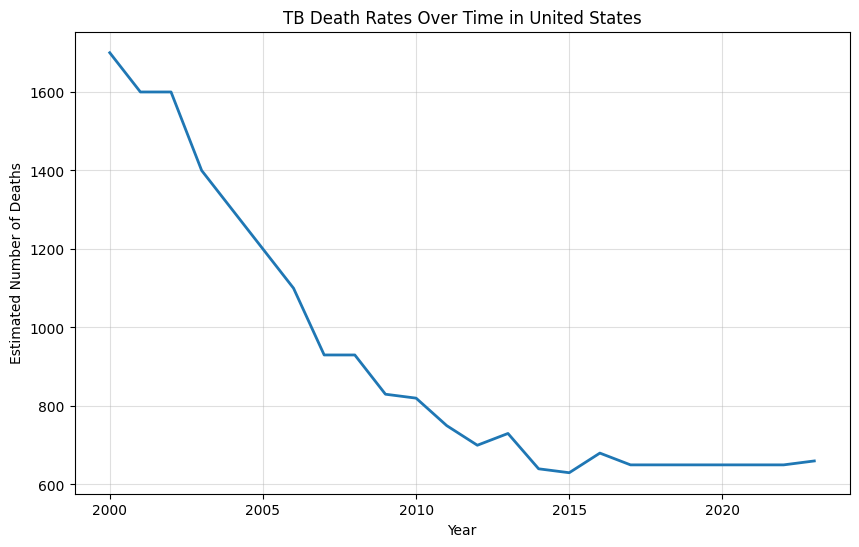

In [8]:
import matplotlib.pyplot as plt

country = "United States"
subset = df.loc[df["Entity"] == country]

plt.figure(figsize=(10, 6))
plt.plot(
    subset["Year"],
    subset["Estimated number of deaths from all forms of tuberculosis"],
    linewidth=2
)

plt.title(f"TB Death Rates Over Time in {country}")
plt.xlabel("Year")
plt.ylabel("Estimated Number of Deaths")
plt.grid(alpha=0.4)
plt.show()


### Bonus: Plotting multiple countries for comparison

Now, let's plot TB death rates for 'United States', 'India', and 'China' to compare their trends.

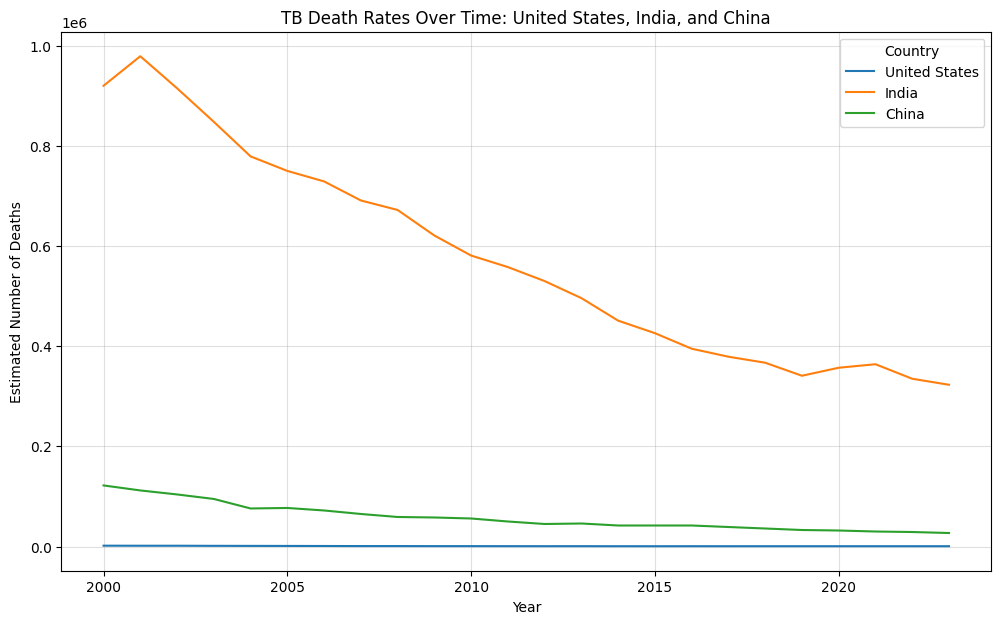

In [10]:
import matplotlib.pyplot as plt

countries = ["United States", "India", "China"]
subset = df[df["Entity"].isin(countries)]

plt.figure(figsize=(12, 7))

for country in countries:
    country_data = subset[subset["Entity"] == country]
    plt.plot(
        country_data["Year"],
        country_data["Estimated number of deaths from all forms of tuberculosis"],
        label=country
    )

plt.title("TB Death Rates Over Time: United States, India, and China")
plt.xlabel("Year")
plt.ylabel("Estimated Number of Deaths")
plt.legend(title="Country")
plt.grid(alpha=0.4)
plt.show()


Exercise 5. Ask & answer a question
Formulate one simple, reproducible question using this dataset (e.g., “Which region had the highest TB death rate in 1990?”).
Answer it with a short code snippet and a brief reflection.


In [11]:
most_recent_year = df["Year"].max()
recent_data = df[df["Year"] == most_recent_year]

top_country = (
    recent_data
    .sort_values("Estimated number of deaths from all forms of tuberculosis", ascending=False)
    .iloc[0]
)

print(
    f"In {most_recent_year}, the country with the highest estimated number "
    f"of TB deaths was {top_country['Entity']} "
    f"({top_country['Estimated number of deaths from all forms of tuberculosis']} deaths)."
)


In 2023, the country with the highest estimated number of TB deaths was World (1218861 deaths).


Conclusion: This analysis highlights the regions most affected by tuberculosis-related mortality in recent years, providing valuable insight for directing public health interventions. It clearly identifies the country with the greatest disease burden in the most recent year captured by the dataset.